# Test 6 nimmt env (by hand)

In [1]:
import numpy as np
import logging
import sys
from tqdm import tqdm
from matplotlib import pyplot as plt

sys.path.append("../")

from rl_6_nimmt import SechsNimmtEnv, GameSession
from rl_6_nimmt.agents import Human, DrunkHamster, MaskedReinforceAgent, BatchedReinforceAgent

logging.basicConfig(format="%(message)s",level=logging.INFO)
for name in logging.root.manager.loggerDict:
    if not "rl_6_nimmt" in name:
        logging.getLogger(name).setLevel(logging.WARNING)


## Setting up the environment and the agents

In [5]:
env = SechsNimmtEnv(num_players=4)

reinforce1 = MaskedReinforceAgent(env)
reinforce1.train()

reinforce2 = BatchedReinforceAgent(env)
reinforce2.train()

hamster1 = DrunkHamster(env)
hamster2 = DrunkHamster(env)

johann = Human(env, name="Johann")
merle = Human(env, name="Merle")


## Let the computer warm up a little bit by playing a few games on their own

In [6]:
session = GameSession(env, reinforce1, reinforce2, hamster1, hamster2)

num_episodes = 20000
for _ in tqdm(range(num_episodes)):
    session.play_game(render=False)


100%|██████████| 10000/10000 [03:31<00:00, 47.27it/s]


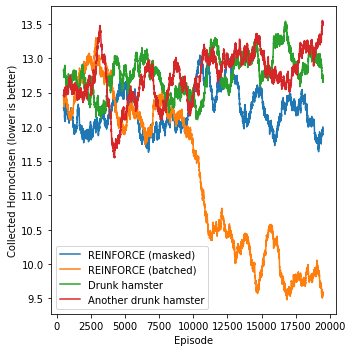

In [10]:
results = np.array(session.results)

def plot_running_mean(x, n=1000, **kwargs):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    running_mean = (cumsum[n:] - cumsum[:-n]) / n
    plt.plot(np.arange(n / 2.0, len(x) + 1 - n / 2.0), running_mean, **kwargs)
    
    
plt.figure(figsize=(5,5))

plot_running_mean(-results[:,0], label="REINFORCE (masked)")
plot_running_mean(-results[:,1], label="REINFORCE (batched)")
plot_running_mean(-results[:,2], label="Drunk hamster")
plot_running_mean(-results[:,3], label="Another drunk hamster")

plt.legend()

plt.xlabel("Episode")
plt.ylabel("Collected Hornochsen (lower is better)")

plt.tight_layout()
plt.show()


It takes 10000 episodes, but then one of the REINFORCE algorithms seems to become better than the random agent :)

## But is it better than Merle?

In [11]:
session = GameSession(env, johann, merle, reinforce1, reinforce2)

# The DEBUG output shows the moves, which is nice
for name in logging.root.manager.loggerDict:
    if "rl_6_nimmt" in name:
        logging.getLogger(name).setLevel(logging.DEBUG)
        

In [12]:
session.play_game(render=True)

Dealing cards
--------------------------------------------------------------------------------
Board:
   61   _   _   _   _   *
   92   _   _   _   _   *
   71   _   _   _   _   *
    3   _   _   _   _   *
Players:
  Johann                (player 1):   0 Hornochsen, cards  10  11  16  18  31  35  46  52  64  98
  Merle                 (player 2):   0 Hornochsen, cards   5  15  28  33  38  60  62  63  70  81
  MaskedReinforceAgent  (player 3):   0 Hornochsen, cards  12  13  30  41  43  45  48  76  77  94
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44  56  57  68  83  89  91
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  10  11  16  18  31  35  46  52  64  98. Choose one to play! 10
It is your turn, Merle! 
 You have the following cards:   5  15  28  33  38  60  62  63  70  81. Choose one to play! 5


[6.8770139e-15 3.5888096e-15 1.5292737e-12 2.6073022e-09 4.4713656e-19
 1.3191721e-11 6.0564206e-11 3.1115843e-11 1.0000000e+00 2.2383599e-09]
Merle                 (player 2) plays card 5
Johann                (player 1) plays card 10
MaskedReinforceAgent  (player 3) plays card 77
BatchedReinforceAgent (player 4) plays card 83
--------------------------------------------------------------------------------
Board:
   61   _   _   _   _   *
   92   _   _   _   _   *
   71  77  83   _   _   *
    3   5  10   _   _   *
Players:
  Johann                (player 1):   0 Hornochsen, cards  11  16  18  31  35  46  52  64  98
  Merle                 (player 2):   0 Hornochsen, cards  15  28  33  38  60  62  63  70  81
  MaskedReinforceAgent  (player 3):   0 Hornochsen, cards  12  13  30  41  43  45  48  76  94
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44  56  57  68  89  91
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  11  16  18  31  35  46  52  64  98. Choose one to play! 11
It is your turn, Merle! 
 You have the following cards:  15  28  33  38  60  62  63  70  81. Choose one to play! 62


[2.9543304e-04 1.5481444e-05 1.0254132e-03 4.7052598e-01 1.3462665e-07
 1.2922643e-02 8.9105153e-03 3.2345578e-01 1.8284857e-01]
Johann                (player 1) plays card 11
MaskedReinforceAgent  (player 3) plays card 41
Merle                 (player 2) plays card 62
BatchedReinforceAgent (player 4) plays card 89
--------------------------------------------------------------------------------
Board:
   61  62   _   _   _   *
   92   _   _   _   _   *
   71  77  83  89   _   *
    3   5  10  11  41   *
Players:
  Johann                (player 1):   0 Hornochsen, cards  16  18  31  35  46  52  64  98
  Merle                 (player 2):   0 Hornochsen, cards  15  28  33  38  60  63  70  81
  MaskedReinforceAgent  (player 3):   0 Hornochsen, cards  12  13  30  43  45  48  76  94
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44  56  57  68  91
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16  18  31  35  46  52  64  98. Choose one to play! 64
It is your turn, Merle! 
 You have the following cards:  15  28  33  38  60  63  70  81. Choose one to play! 63


[2.03279988e-03 8.78949504e-05 1.67390984e-03 7.40317319e-06
 2.56603267e-02 4.87398077e-03 8.64862442e-01 1.00801215e-01]
Merle                 (player 2) plays card 63
Johann                (player 1) plays card 64
MaskedReinforceAgent  (player 3) plays card 76
BatchedReinforceAgent (player 4) plays card 91
--------------------------------------------------------------------------------
Board:
   61  62  63  64  76   *
   92   _   _   _   _   *
   71  77  83  89  91   *
    3   5  10  11  41   *
Players:
  Johann                (player 1):   0 Hornochsen, cards  16  18  31  35  46  52  98
  Merle                 (player 2):   0 Hornochsen, cards  15  28  33  38  60  70  81
  MaskedReinforceAgent  (player 3):   0 Hornochsen, cards  12  13  30  43  45  48  94
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44  56  57  68
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16  18  31  35  46  52  98. Choose one to play! 98
It is your turn, Merle! 
 You have the following cards:  15  28  33  38  60  70  81. Choose one to play! 28


[5.5550728e-03 7.3606620e-04 4.3111877e-03 1.6462873e-04 7.9763603e-01
 1.8990196e-02 1.7260681e-01]
Merle                 (player 2) plays card 28
  ...chooses to replace row 2
  ...and gains 1 Hornochsen
MaskedReinforceAgent  (player 3) plays card 45
  ...and gains 12 Hornochsen
BatchedReinforceAgent (player 4) plays card 68
Johann                (player 1) plays card 98
  ...and gains 9 Hornochsen
--------------------------------------------------------------------------------
Board:
   61  62  63  64  76   *
   28   _   _   _   _   *
   98   _   _   _   _   *
   45  68   _   _   _   *
Players:
  Johann                (player 1):   9 Hornochsen, cards  16  18  31  35  46  52
  Merle                 (player 2):   1 Hornochsen, cards  15  33  38  60  70  81
  MaskedReinforceAgent  (player 3):  12 Hornochsen, cards  12  13  30  43  48  94
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44  56  57
-------------------------------------------------------------------

It is your turn, Johann! 
 You have the following cards:  16  18  31  35  46  52. Choose one to play! 31
It is your turn, Merle! 
 You have the following cards:  15  33  38  60  70  81. Choose one to play! 70


[8.8378147e-07 2.7395261e-06 1.1549065e-04 4.6486517e-10 2.1328934e-02
 9.7855192e-01]
Johann                (player 1) plays card 31
BatchedReinforceAgent (player 4) plays card 57
Merle                 (player 2) plays card 70
MaskedReinforceAgent  (player 3) plays card 94
  ...and gains 5 Hornochsen
--------------------------------------------------------------------------------
Board:
   94   _   _   _   _   *
   28  31  57   _   _   *
   98   _   _   _   _   *
   45  68  70   _   _   *
Players:
  Johann                (player 1):   9 Hornochsen, cards  16  18  35  46  52
  Merle                 (player 2):   1 Hornochsen, cards  15  33  38  60  81
  MaskedReinforceAgent  (player 3):  17 Hornochsen, cards  12  13  30  43  48
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44  56
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16  18  35  46  52. Choose one to play! 18
It is your turn, Merle! 
 You have the following cards:  15  33  38  60  81. Choose one to play! 60


[6.2456104e-04 9.8152123e-05 2.1797134e-02 7.8753800e-07 9.7747940e-01]
Johann                (player 1) plays card 18
  ...chooses to replace row 1
  ...and gains 1 Hornochsen
MaskedReinforceAgent  (player 3) plays card 48
BatchedReinforceAgent (player 4) plays card 56
Merle                 (player 2) plays card 60
--------------------------------------------------------------------------------
Board:
   18  48  56   _   _   *
   28  31  57  60   _   *
   98   _   _   _   _   *
   45  68  70   _   _   *
Players:
  Johann                (player 1):  10 Hornochsen, cards  16  35  46  52
  Merle                 (player 2):   1 Hornochsen, cards  15  33  38  81
  MaskedReinforceAgent  (player 3):  17 Hornochsen, cards  12  13  30  43
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  42  44
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16  35  46  52. Choose one to play! 46
It is your turn, Merle! 
 You have the following cards:  15  33  38  81. Choose one to play! 33


[7.8554619e-03 3.0592908e-03 9.8884702e-01 2.3827335e-04]
MaskedReinforceAgent  (player 3) plays card 30
  ...chooses to replace row 3
  ...and gains 1 Hornochsen
Merle                 (player 2) plays card 33
BatchedReinforceAgent (player 4) plays card 42
Johann                (player 1) plays card 46
--------------------------------------------------------------------------------
Board:
   18  48  56   _   _   *
   28  31  57  60   _   *
   30  33  42  46   _   *
   45  68  70   _   _   *
Players:
  Johann                (player 1):  10 Hornochsen, cards  16  35  52
  Merle                 (player 2):   1 Hornochsen, cards  15  38  81
  MaskedReinforceAgent  (player 3):  18 Hornochsen, cards  12  13  43
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  29  44
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16  35  52. Choose one to play! 52
It is your turn, Merle! 
 You have the following cards:  15  38  81. Choose one to play! 81


[0.78301185 0.04906688 0.16792127]
MaskedReinforceAgent  (player 3) plays card 12
  ...chooses to replace row 1
  ...and gains 3 Hornochsen
BatchedReinforceAgent (player 4) plays card 29
Johann                (player 1) plays card 52
Merle                 (player 2) plays card 81
--------------------------------------------------------------------------------
Board:
   12  29   _   _   _   *
   28  31  57  60   _   *
   30  33  42  46  52   *
   45  68  70  81   _   *
Players:
  Johann                (player 1):  10 Hornochsen, cards  16  35
  Merle                 (player 2):   1 Hornochsen, cards  15  38
  MaskedReinforceAgent  (player 3):  21 Hornochsen, cards  13  43
  BatchedReinforceAgent (player 4):   0 Hornochsen, cards  17  44
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16  35. Choose one to play! 35
It is your turn, Merle! 
 You have the following cards:  15  38. Choose one to play! 38


[0.07192373 0.9280762 ]
Johann                (player 1) plays card 35
Merle                 (player 2) plays card 38
MaskedReinforceAgent  (player 3) plays card 43
BatchedReinforceAgent (player 4) plays card 44
  ...and gains 6 Hornochsen
--------------------------------------------------------------------------------
Board:
   44   _   _   _   _   *
   28  31  57  60   _   *
   30  33  42  46  52   *
   45  68  70  81   _   *
Players:
  Johann                (player 1):  10 Hornochsen, cards  16
  Merle                 (player 2):   1 Hornochsen, cards  15
  MaskedReinforceAgent  (player 3):  21 Hornochsen, cards  13
  BatchedReinforceAgent (player 4):   6 Hornochsen, cards  17
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  16. Choose one to play! 16
It is your turn, Merle! 
 You have the following cards:  15. Choose one to play! 15


[1.]
MaskedReinforceAgent  (player 3) plays card 13
  ...chooses to replace row 1
  ...and gains 5 Hornochsen
Merle                 (player 2) plays card 15
Johann                (player 1) plays card 16
BatchedReinforceAgent (player 4) plays card 17
--------------------------------------------------------------------------------
Board:
   13  15  16  17   _   *
   28  31  57  60   _   *
   30  33  42  46  52   *
   45  68  70  81   _   *
Players:
  Johann                (player 1):  10 Hornochsen, no cards 
  Merle                 (player 2):   1 Hornochsen, no cards 
  MaskedReinforceAgent  (player 3):  26 Hornochsen, no cards 
  BatchedReinforceAgent (player 4):   6 Hornochsen, no cards 
The game is over! Merle                 (player 2) wins, MaskedReinforceAgent  (player 3) loses. Congratulations!
--------------------------------------------------------------------------------


Merle is just too strong...